In [ ]:
# !pip install gensim
# !pip install fugashi[unidic]
# !python -m unidic download

# 整形処理
1. テキストデータの読み込み
2. 整形処理
3. 辞書・コーパスの作成

👇を参照してノートブック内で、`NotImplementedError`が発生する箇所を実装してください。
https://radimrehurek.com/gensim/auto_examples/core/run_corpora_and_vector_spaces.html


In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
import os

# Load the livedoor news corpus
# １行目：記事のURL
# ２行目：記事の日付
# ３行目：記事のタイトル
# ４行目以降：記事の本文

path_to_corpus = '../../text'  # 事前にDLして解凍が必要（https://www.rondhuit.com/download.html）
skip_files = ['LICENSE.txt', 'CHANGES.txt', 'README.txt']
documents = []
for category in os.listdir(path_to_corpus):
    raise NotImplementedError("演習1-1: 記事の本文の文字列をdocumentsに追加する処理をここに書いてください。")


In [ ]:
import re
import requests
from fugashi import Tagger

# ストップワードの準備
url = "http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt"
r = requests.get(url)
tmp = r.text.split('\r\n')
stopwords = []
for i in range(len(tmp)):
    if len(tmp[i]) < 1:
        continue
    stopwords.append(tmp[i])

# 全角半角文字以外（記号と数字）を正規表現を使って除去. List[str]->List[str]
raise NotImplementedError("演習1-2: 正規表現で全角半角文字以外とマッチさせて、空文字で置き換えます。")

# Mecabで分かち書きして、単語に分割. List[str]->List[List[str]]
raise NotImplementedError("演習1-3: Taggerに分かち書きになるように指定します。単語のリストに変換してください。")

# ストップワードの除去. List[List[str]]->List[List[str]]
raise NotImplementedError("演習1-4: stopwordsに含まれる単語は追加しないようにします。")

# 1文字は除去. List[List[str]]->List[List[str]]
raise NotImplementedError("演習1-5: 単語の長さが1の単語は追加しないようにします。")


print(sum([sum(text) for text in documents]))

In [ ]:
from gensim.corpora import Dictionary, MmCorpus
from sklearn.model_selection import train_test_split

# 辞書の作成、保存、読み込み
raise NotImplementedError("演習1-6: Dictionaryを使って辞書を作成します。保存・読み込みの処理も書いてください。")

# コーパスの作成、分割、保存、読み込み
raise NotImplementedError("演習1-7: Dictionaryを使ってコーパスを作成します。trainとtestに8:2に分割する処理、trainとtestそれぞれを保存・読み込みの処理も書いてください。")


# TFIDF
1. コーパスの読み込み
1. TFIDFに変換
1. 新規データをTFIDFに変換


👇を参照してノートブック内で、`NotImplementedError`が発生する箇所を実装してください。
https://radimrehurek.com/gensim/auto_examples/core/run_topics_and_transformations.html

In [ ]:
from gensim.corpora import Dictionary, MmCorpus
from gensim import models

# 演習1-6,7で作成した辞書、コーパスを読み込む
dictionary = ...
corpus_train = ...
corpus_test = ...

# corpus_trainをTFIDFモデルの作成と保存
tfidf = ...
raise NotImplementedError("演習2-1: models.TfidfModelを使います。")

# corpus_test[0][:10]を使って、変換前の値（BagOfWords）と変換後の値（TFIDF）をプリントして比較
raise NotImplementedError("演習2-2: 変換によって変わるのは値だけです。（token_id, value）という構造は変わりません。単語がidになっているので、文字列に変換して、表示させてください。")

# 　類似度:similarities
- 類似度：コサイン類似度
- ベクトルの似ている度合いを定量化する
- modelと同じように、__getitem__で計算を行う

👇を参照してノートブック内で、`NotImplementedError`が発生する箇所を実装してください。
https://radimrehurek.com/gensim/auto_examples/core/run_similarity_queries.html
https://radimrehurek.com/gensim/similarities/docsim.html

In [ ]:
from gensim.corpora import MmCorpus
from gensim import models
from gensim import similarities
import numpy as np

# 演習2-1で作成したコーパスとTFIDFモデルを読み込む
corpus_test = ...
tfidf = ...

# クエリを受け取り、TFIDFモデルを使って、類似度を計算するためのモジュールを呼び出します。
index = ...
raise NotImplementedError("演習3-1: similarities.MatrixSimilarity()を使います。")

# TFIDFモデルを作るときに使ったコーパスの先頭から５個（corpus_test[:5]）それぞれをクエリーとして類似度を計算して、最も似ているドキュメントのインデックをprintしてください。
for i in range(5):
    best_sim_id = ...
    raise NotImplementedError("演習3-2: 最も似ているドキュメントのインデックをbest_sim_idに代入してください")
    print(f"{i}と最も似ているのはドキュメントは{best_sim_id}")

### BagOfWordsとTFIDFの類似度行列
1. TFIDFモデルを使って、変換前のコーパス（BagOfWOrds）との類似度行列の計算してください
1. numpyを使ってに、上記と同じ類似度の計算を行なってください
1. 行列の値をそのまま、mtaplotlibで可視化し、numpyで実装した類似度行列とgensimの類似度行列が同じであることを確認してください

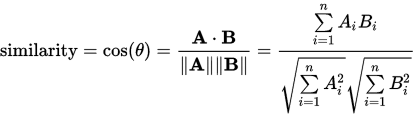



In [ ]:
from gensim.corpora import MmCorpus
from gensim import models
from gensim import similarities
import numpy as np

tfidf = models.TfidfModel.load('tfidf.model')
corpus_test = MmCorpus('doc_test.mm')

index = similarities.MatrixSimilarity(tfidf[corpus_test[:10]], num_features=corpus_test.num_terms)
similarity_gensim = ...

raise NotImplementedError("演習3-3: corpus_test[:10]をクエリーとして使って、類似度行列をsimilarity_gensimに代入してください。")

similarity_gensim.shape


In [ ]:
import numpy as np
from gensim.corpora import MmCorpus
from gensim import matutils
from gensim import models
from gensim import similarities

tfidf = models.TfidfModel.load('tfidf.model')
corpus_test = MmCorpus('doc_test.mm')

A_bow = matutils.corpus2dense(corpus_test[:10], num_docs=10, num_terms=corpus_test.num_terms).T
A_tfidf = matutils.corpus2dense(tfidf[corpus_test[:10]], num_docs=10, num_terms=corpus_test.num_terms).T
A_tfidf_norm = ...
A_bow_norm = ...
similarity_matrix = ...
raise NotImplementedError("演習3-4: コーパスの各行がドキュメントです。行方向に正規化してから内積を取ります。")



similarity_matrix.shape

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4, hspace=0.6)

im_0 = ax[0].imshow(similarity_gensim, cmap='hot')
axpos = ax[0].get_position()
cbar_ax = fig.add_axes([0.46, axpos.y0, 0.02, axpos.height])
cbar = fig.colorbar(im_0, cax=cbar_ax)

im_1 = ax[1].imshow(similarity_matrix, cmap='hot')
axpos = ax[1].get_position()
cbar_ax = fig.add_axes([0.92, axpos.y0, 0.02, axpos.height])
cbar = fig.colorbar(im_1, cax=cbar_ax)